In [487]:
import geopandas as gpd
import pandas as pd
import osmnx as ox
import momepy

In [488]:
# Convert shapefile to graph
hghway = gpd.read_file("data/oregon_highways.shp")
graph = momepy.gdf_to_nx(hghway, approach="primal", directed=True)

In [489]:
# Convert graph to gdf
nodes, edges = momepy.nx_to_gdf(graph)

In [490]:
# Provide an x and y for OSMnx
nodes['x'] = nodes['geometry'].x
nodes['y'] = nodes['geometry'].y

In [491]:
# Provide a u and v for OSMnx
edges['u'] = edges['node_start']
edges['v'] = edges['node_end']

In [492]:
# Make all roads "two-way"
opposite_direction = edges.copy()
opposite_direction = opposite_direction.rename(columns={"u": "v", "v": "u"})
directed_edges = pd.concat([edges, opposite_direction], ignore_index=True)

In [493]:
edges = directed_edges.set_index(['u', 'v'])

In [494]:
# Add a key index
doubles = edges[edges.index.duplicated()].copy()
singles = edges[~edges.index.duplicated()].copy()

singles['key'] = 0
doubles['key'] = 1

edges = pd.concat([singles, doubles])

In [495]:
# Make the multi-index
edges = edges.reset_index().set_index(['u', 'v', 'key'])

In [496]:
# Rename some columns
edges = edges[['HWYNAME','mm_len', 'geometry']]
edges = edges.rename(columns={"HWYNAME": "name", "mm_len": "length"})

In [497]:
# Convery back to graph
gdf = ox.graph_from_gdfs(nodes, edges)

In [498]:
# Save and load
ox.save_graphml(gdf, './data/graph.graphml')
graph = ox.load_graphml('./data/graph.graphml')

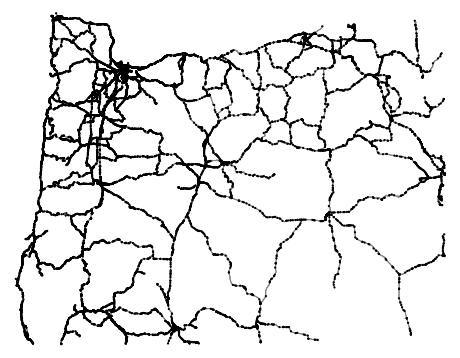

In [499]:
# Plot
fig, ax = ox.plot_graph(graph, bgcolor='white', node_color='black', edge_color='grey', node_size=5)